# California Housing Regression with Neural Networks
### Train a neural network regression model and explore key questions about architecture, activations, and metrics

### Import the Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error


import tensorflow as tf
from tensorflow import keras

### Load dataset

In [30]:
california = fetch_california_housing()
X, y = california.data, california.target

### Train/test split

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale features

In [32]:
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)

### Function to build a regression neural network

In [33]:
# Scale target
def build_model(activation="relu", optimizer="adam", hidden_layers=2, units=64):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(hidden_layers - 1):
        model.add(keras.layers.Dense(units, activation=activation))
    model.add(keras.layers.Dense(1, activation="linear"))  # regression output
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model

### Train models with different setups

In [34]:
results = {}
configs = [("relu", "adam"), ("tanh", "adam"), ("relu", "sgd")]
results = {}
configs = [("relu", "adam"), ("tanh", "adam"), ("relu", "sgd")]

for activation, optimizer in configs:
    print(f"\nTraining model with activation={activation}, optimizer={optimizer}")
    model = build_model(activation=activation, optimizer=optimizer, hidden_layers=2, units=64)
    history = model.fit(
        X_train, y_train_scaled,
        validation_data=(X_val, y_val_scaled),
        epochs=20,
        batch_size=32,
        verbose=0
    )
    
    # Inverse-transform predictions
    train_pred = scaler_y.inverse_transform(model.predict(X_train)).flatten()
    val_pred = scaler_y.inverse_transform(model.predict(X_val)).flatten()

    # Compute metrics
    mse_train = mean_squared_error(y_train, train_pred)
    mse_val = mean_squared_error(y_val, val_pred)
    mae_train = mean_absolute_error(y_train, train_pred)
    mae_val = mean_absolute_error(y_val, val_pred)

    results[(activation, optimizer)] = {
        "mse_train": mse_train,
        "mse_val": mse_val,
        "mae_train": mae_train,
        "mae_val": mae_val,
    }


Training model with activation=relu, optimizer=adam


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 

Training model with activation=tanh, optimizer=adam


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Training model with activation=relu, optimizer=sgd


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [38]:
history_relu_adam = build_model(activation="relu", optimizer="adam").fit(
    X_train, y_train_scaled,
    validation_data=(X_val, y_val_scaled),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50


C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.3723 - mae: 0.4304 - val_loss: 0.3349 - val_mae: 0.3869
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.3473 - mae: 0.3792 - val_loss: 0.2745 - val_mae: 0.3851
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.2672 - mae: 0.3618 - val_loss: 0.2555 - val_mae: 0.3501
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2603 - mae: 0.3510 - val_loss: 0.2432 - val_mae: 0.3455
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.2378 - mae: 0.3411 - val_loss: 0.2380 - val_mae: 0.3384
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.2373 - mae: 0.3370 - val_loss: 0.2392 - val_mae: 0.3314
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3105 - mae: 0.3398 - val_loss: 0.2289 - val_mae: 0.3290
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.2362 - mae: 0.3293 - val_loss: 0.2258 - val_mae: 0.3277
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.2206 

In [43]:
# Use a smaller learning rate for SGD to prevent divergence
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.001)
history_tanh_sgd = build_model(activation="tanh", optimizer=sgd_optimizer).fit(
    X_train, y_train_scaled,
    validation_data=(X_val, y_val_scaled),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.5862 - mae: 0.5844 - val_loss: 0.4888 - val_mae: 0.5254
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4472 - mae: 0.5003 - val_loss: 0.4404 - val_mae: 0.4872
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4083 - mae: 0.4716 - val_loss: 0.4114 - val_mae: 0.4689
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3854 - mae: 0.4558 - val_loss: 0.3945 - val_mae: 0.4556
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3719 - mae: 0.4463 - val_loss: 0.3846 - val_mae: 0.4494
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3638 - mae: 0.4410 - val_loss: 0.3781 - val_mae: 0.4454
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3586 - mae: 0.4379 - val_loss: 0.3728 - val_mae: 0.4431
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.3549 - mae: 0.4357 - val_loss: 0.3698 - val_mae: 0.4404
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - lo

In [46]:
# Report results
for (activation, optimizer), metrics in results.items():
    print(f"\n=== Model (activation={activation}, optimizer={optimizer}) ===")
    print(f"Train MSE: {metrics['mse_train']:.4f}, Val MSE: {metrics['mse_val']:.4f}")
    print(f"Train MAE: {metrics['mae_train']:.4f}, Val MAE: {metrics['mae_val']:.4f}")


=== Model (activation=relu, optimizer=adam) ===
Train MSE: 0.2565, Val MSE: 0.2783
Train MAE: 0.3459, Val MAE: 0.3583

=== Model (activation=tanh, optimizer=adam) ===
Train MSE: 0.2912, Val MSE: 0.3076
Train MAE: 0.3785, Val MAE: 0.3888

=== Model (activation=relu, optimizer=sgd) ===
Train MSE: 0.3102, Val MSE: 0.3263
Train MAE: 0.3832, Val MAE: 0.3931


### Plotting function

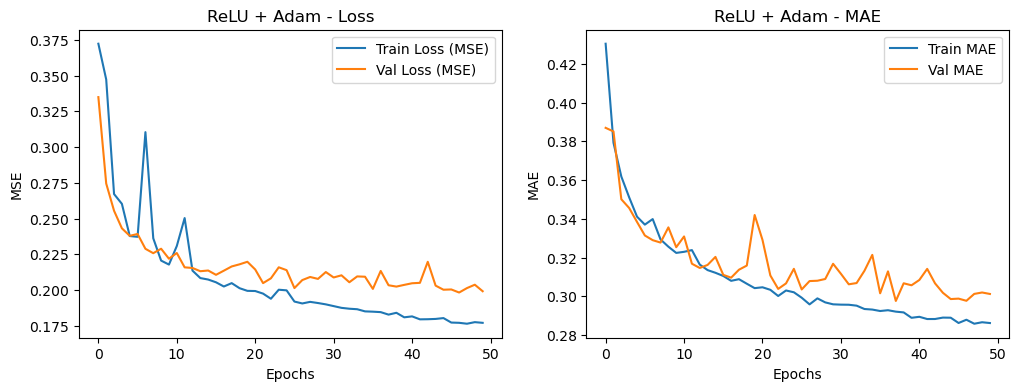

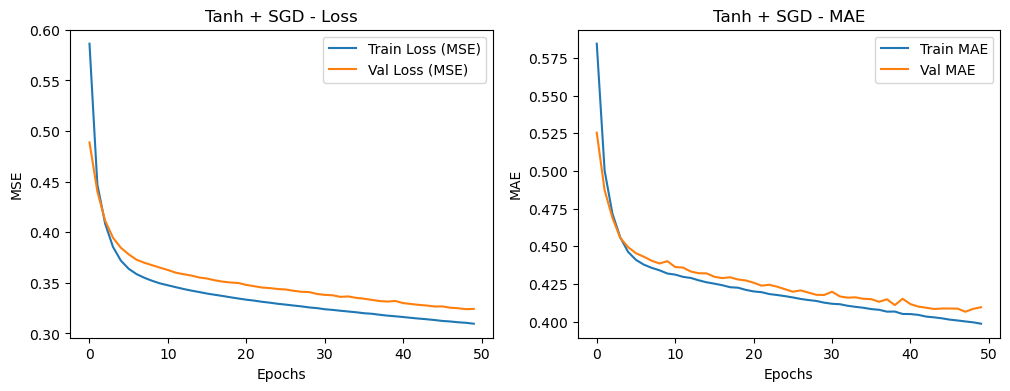

In [45]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    # Loss (MSE)
    plt.subplot(1, 2, 1)
    plt.plot(history.history["loss"], label="Train Loss (MSE)")
    plt.plot(history.history["val_loss"], label="Val Loss (MSE)")
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    plt.title(f"{title} - Loss")
    plt.legend()
    
    # MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history["mae"], label="Train MAE")
    plt.plot(history.history["val_mae"], label="Val MAE")
    plt.xlabel("Epochs")
    plt.ylabel("MAE")
    plt.title(f"{title} - MAE")
    plt.legend()
    
    plt.show()

# ==============================
# Plot learning curves
# ==============================
plot_history(history_relu_adam, "ReLU + Adam")
plot_history(history_tanh_sgd, "Tanh + SGD")